In [1]:
# Importing necessary libraries

import os as os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Setting up working directory

os.chdir("C:\\Users\\HP\\Desktop\\Bluetick.ai\\Electric Vehicles Sales Drop\\Work Files _ CSV")

In [4]:
# Looking up files stored in our working directory

os.listdir()

['Business Insights for SAPL Sales Funnel Analysis.pptx',
 'emails.csv',
 'email_subject.csv',
 'products.csv',
 'sales.csv',
 'Zoom scooter - Data Analysis.docx',
 'Zoom Scooter - Data Analysis.ipynb',
 '~$Business Insights for SAPL Sales Funnel Analysis.pptx']

In [5]:
# Reading the csv files and storing them in respective dataframes

emails=pd.read_csv("emails.csv")
email_subject=pd.read_csv("email_subject.csv")
products=pd.read_csv("products.csv")
sales=pd.read_csv("sales.csv")

#  D1: Launch Date Assumption

In [6]:
products

,product_id,model,year,product_type,base_price,production_start_date,production_end_date
0,1,FioNex,2010,scooter,63998,03-03-2010 00:00,08-06-2012 00:00
1,2,FioNex Limited Edition,2011,scooter,127998,03-01-2011 00:00,30-03-2011 00:00
2,3,FioNex,2013,scooter,79998,01-05-2013 00:00,28-12-2018 00:00
3,4,DeltaPlus,2014,automobile,920000,23-06-2014 00:00,28-12-2018 00:00
4,5,Parker,2014,scooter,111998,23-06-2014 00:00,27-01-2015 00:00
5,6,Corpel,2015,automobile,524000,15-04-2015 00:00,01-10-2018 00:00
6,7,Sprint,2016,scooter,95998,10-10-2016 00:00,NaN
7,8,Sprint Limited Edition,2017,scooter,111998,15-02-2017 00:00,NaN
8,9,SigniaSafari,2017,automobile,280000,15-02-2017 00:00,NaN
9,10,Zelito800,2017,automobile,686000,15-02-2017 00:00,NaN


In [7]:
sales

,customer_id,product_id,sales_transaction_date,channel,dealership_id
0,1,7,2017-07-19 08:38:00,internet,NaN
1,22,7,2017-08-14 09:59:00,dealership,20.0
2,145,7,2019-01-20 10:40:00,internet,NaN
3,289,7,2017-05-09 14:20:00,dealership,7.0
4,331,7,2019-05-21 20:03:00,dealership,4.0
...,...,...,...,...,...
37706,42179,11,2019-04-06 13:17:00,internet,NaN
37707,42977,11,2019-03-30 04:52:00,dealership,7.0
37708,48246,11,2019-05-25 20:19:00,dealership,9.0
37709,49214,11,2019-05-13 21:09:00,dealership,3.0


In [8]:
# Description about the dataset 'products'

products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             12 non-null     int64 
 1   model                  12 non-null     object
 2   year                   12 non-null     int64 
 3   product_type           12 non-null     object
 4   base_price             12 non-null     int64 
 5   production_start_date  12 non-null     object
 6   production_end_date    6 non-null      object
dtypes: int64(3), object(4)
memory usage: 800.0+ bytes


In [9]:
# Description about the dataset 'sales'

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37711 entries, 0 to 37710
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             37711 non-null  int64  
 1   product_id              37711 non-null  int64  
 2   sales_transaction_date  37711 non-null  object 
 3   channel                 37711 non-null  object 
 4   dealership_id           16648 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.4+ MB


In [10]:
# Since we are interested only in 'Sprint' and 'Sprint Limited' scooters sales, we'll extract them from the respective datasets

products_new=products.iloc[[6,7]]

In [11]:
# Only 'sprint' and 'sprint limited' data

products_new

,product_id,model,year,product_type,base_price,production_start_date,production_end_date
6,7,Sprint,2016,scooter,95998,10-10-2016 00:00,NaN
7,8,Sprint Limited Edition,2017,scooter,111998,15-02-2017 00:00,NaN


In [12]:
# '.query' method takes a query expression as a string parameter and returns the dataframe where the expression is true

sales_sprint=sales.query("product_id==7")

In [13]:
sales_sprint

,customer_id,product_id,sales_transaction_date,channel,dealership_id
0,1,7,2017-07-19 08:38:00,internet,NaN
1,22,7,2017-08-14 09:59:00,dealership,20.0
2,145,7,2019-01-20 10:40:00,internet,NaN
3,289,7,2017-05-09 14:20:00,dealership,7.0
4,331,7,2019-05-21 20:03:00,dealership,4.0
...,...,...,...,...,...
7323,45329,7,2016-12-29 13:21:00,dealership,11.0
7324,2972,7,2019-01-15 04:20:00,internet,NaN
7325,29899,7,2018-12-24 03:13:00,internet,NaN
7326,48702,7,2018-10-22 20:18:00,dealership,5.0


In [14]:
# Another way of subsetting the dataframe: sales[(sales["product_id"]==7)]

In [15]:
# Subsetting 'sales' for 'sprint limited'

sales_sprint_ltd=sales[(sales["product_id"]==8)]

In [16]:
sales_sprint_ltd

,customer_id,product_id,sales_transaction_date,channel,dealership_id
7328,4415,8,2019-01-08 07:17:00,internet,NaN
7329,33849,8,2019-03-29 16:38:00,dealership,18.0
7330,38176,8,2019-04-24 13:50:00,internet,NaN
7331,23388,8,2018-12-31 09:27:00,internet,NaN
7332,3791,8,2019-05-21 03:49:00,dealership,10.0
...,...,...,...,...,...
13126,19289,8,2019-01-13 21:54:00,dealership,1.0
13127,42883,8,2018-10-25 16:30:00,dealership,18.0
13128,1471,8,2019-01-25 00:44:00,internet,NaN
13129,27931,8,2019-04-27 23:41:00,internet,NaN


In [17]:
# Sorting our dataframes according to transaction date

sales_sprint.sort_values("sales_transaction_date", inplace=True)

sales_sprint_ltd.sort_values("sales_transaction_date", inplace=True)

In [18]:
# Need to convert "sales_date" to datetime object, and converting to only date (and back into object) using 'dt.date'

sales_sprint["sales_transaction_date"]=pd.to_datetime(sales_sprint["sales_transaction_date"]).dt.date

sales_sprint_ltd["sales_transaction_date"]=pd.to_datetime(sales_sprint_ltd["sales_transaction_date"]).dt.date

In [19]:
sales_sprint.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7328 entries, 5491 to 4926
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             7328 non-null   int64  
 1   product_id              7328 non-null   int64  
 2   sales_transaction_date  7328 non-null   object 
 3   channel                 7328 non-null   object 
 4   dealership_id           4044 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 343.5+ KB


In [20]:
# Here, we are grouping our dataset according to the 'transaction date', and counting the size of each transaction date, and renaming it as "sales"

sprint_sum=sales_sprint.groupby("sales_transaction_date").size().reset_index(name="sales")

sprint_ltd_sum=sales_sprint_ltd.groupby("sales_transaction_date").size().reset_index(name="sales")

In [21]:
# We need to take only the 1st 21 rows (21 days) data to compare the sales of the 'sprint' and 'sprint limited'

sprint_sum_1=sprint_sum[0:21]

sprint_ltd_sum_1=sprint_ltd_sum[0:21]

# Performing 7 day rolling sum and other calculations for sprint 

In [22]:
# Adding a column 'day no.' for better representation and resetting index

sprint_sum_1["day no."]=sprint_sum_1.index+1

sprint_sum_1.set_index("day no.", inplace=True)

In [23]:
# Renaming the 'sales' column

sprint_sum_1.rename(columns={"sales":"sales per day of Sprint"}, inplace=True);sprint_sum_1

,sales_transaction_date,sales per day of Sprint
day no.,,
1,2016-10-10,9
2,2016-10-11,6
3,2016-10-12,10
4,2016-10-13,10
5,2016-10-14,5
6,2016-10-15,10
7,2016-10-16,14
8,2016-10-17,9
9,2016-10-18,11


In [24]:
# Calculating the rolling 7 day volume of sales; since we're performing the operation on "sales per day", no need to mention axis=1

# Calculating previous rolling 7 day volume by shifting our rolling calculation by 1 row

sprint_sum_1["7 day cumulative sales of sprint"]=sprint_sum_1["sales per day of Sprint"].rolling(window=7, min_periods=7).sum()

sprint_sum_1["prior period sales of sprint"]=sprint_sum_1["sales per day of Sprint"].shift(1).rolling(window=7, min_periods=7).sum()

In [25]:
sprint_sum_1

,sales_transaction_date,sales per day of Sprint,7 day cumulative sales of sprint,prior period sales of sprint
day no.,,,,
1,2016-10-10,9,NaN,NaN
2,2016-10-11,6,NaN,NaN
3,2016-10-12,10,NaN,NaN
4,2016-10-13,10,NaN,NaN
5,2016-10-14,5,NaN,NaN
6,2016-10-15,10,NaN,NaN
7,2016-10-16,14,64.0,NaN
8,2016-10-17,9,64.0,64.0
9,2016-10-18,11,69.0,64.0


In [26]:
# Calculating percentage growth/decline in sales

sprint_sum_1["% growth/decline in sales of sprint"]=((sprint_sum_1["7 day cumulative sales of sprint"]-sprint_sum_1["prior period sales of sprint"])/sprint_sum_1["prior period sales of sprint"])*100

In [27]:
# Final complete table for 'sprint' sales

sprint_sum_1

,sales_transaction_date,sales per day of Sprint,7 day cumulative sales of sprint,prior period sales of sprint,% growth/decline in sales of sprint
day no.,,,,,
1,2016-10-10,9,NaN,NaN,NaN
2,2016-10-11,6,NaN,NaN,NaN
3,2016-10-12,10,NaN,NaN,NaN
4,2016-10-13,10,NaN,NaN,NaN
5,2016-10-14,5,NaN,NaN,NaN
6,2016-10-15,10,NaN,NaN,NaN
7,2016-10-16,14,64.0,NaN,NaN
8,2016-10-17,9,64.0,64.0,0.000000
9,2016-10-18,11,69.0,64.0,7.812500


# Performing 7 day rolling sum and other operations for 'Sprint Limited'

In [28]:
# Adding a column 'day no.' for better representation and resetting index

sprint_ltd_sum_1["day no."]=sprint_ltd_sum_1.index+1

sprint_ltd_sum_1.set_index("day no.", inplace=True)

In [29]:
# Renaming the 'sales' column

sprint_ltd_sum_1.rename(columns={"sales":"sales per day of Sprint LE"}, inplace=True);sprint_ltd_sum_1

,sales_transaction_date,sales per day of Sprint LE
day no.,,
1,2017-02-15,6
2,2017-02-16,2
3,2017-02-17,1
4,2017-02-18,4
5,2017-02-19,5
6,2017-02-20,6
7,2017-02-21,5
8,2017-02-22,4
9,2017-02-23,6


In [30]:
# Calculating the rolling 7 day volume of sales; since we're performing the operation on "sales per day", no need to mention axis=1

# Calculating previous rolling 7 day volume by shifting our rolling calculation by 1 row

sprint_ltd_sum_1["7 day cumulative sales of sprint LE"]=sprint_ltd_sum_1["sales per day of Sprint LE"].rolling(window=7, min_periods=7).sum()

sprint_ltd_sum_1["prior period sales of sprint LE"]=sprint_ltd_sum_1["sales per day of Sprint LE"].shift(1).rolling(window=7, min_periods=7).sum()

In [31]:
sprint_ltd_sum_1

,sales_transaction_date,sales per day of Sprint LE,7 day cumulative sales of sprint LE,prior period sales of sprint LE
day no.,,,,
1,2017-02-15,6,NaN,NaN
2,2017-02-16,2,NaN,NaN
3,2017-02-17,1,NaN,NaN
4,2017-02-18,4,NaN,NaN
5,2017-02-19,5,NaN,NaN
6,2017-02-20,6,NaN,NaN
7,2017-02-21,5,29.0,NaN
8,2017-02-22,4,27.0,29.0
9,2017-02-23,6,31.0,27.0


In [32]:
# Calculating percentage growth/decline in sales

sprint_ltd_sum_1["% growth/decline in sales of sprint LE"]=((sprint_ltd_sum_1["7 day cumulative sales of sprint LE"]-sprint_ltd_sum_1["prior period sales of sprint LE"])/sprint_ltd_sum_1["prior period sales of sprint LE"])*100

In [33]:
sprint_ltd_sum_1

,sales_transaction_date,sales per day of Sprint LE,7 day cumulative sales of sprint LE,prior period sales of sprint LE,% growth/decline in sales of sprint LE
day no.,,,,,
1,2017-02-15,6,NaN,NaN,NaN
2,2017-02-16,2,NaN,NaN,NaN
3,2017-02-17,1,NaN,NaN,NaN
4,2017-02-18,4,NaN,NaN,NaN
5,2017-02-19,5,NaN,NaN,NaN
6,2017-02-20,6,NaN,NaN,NaN
7,2017-02-21,5,29.0,NaN,NaN
8,2017-02-22,4,27.0,29.0,-6.896552
9,2017-02-23,6,31.0,27.0,14.814815


In [34]:
# Concatenating the two dataframes into a single one along column axis 

growth_comp=pd.concat([sprint_sum_1, sprint_ltd_sum_1], axis="columns"); growth_comp

,sales_transaction_date,sales per day of Sprint,7 day cumulative sales of sprint,prior period sales of sprint,% growth/decline in sales of sprint,sales_transaction_date,sales per day of Sprint LE,7 day cumulative sales of sprint LE,prior period sales of sprint LE,% growth/decline in sales of sprint LE
day no.,,,,,,,,,,
1,2016-10-10,9,NaN,NaN,NaN,2017-02-15,6,NaN,NaN,NaN
2,2016-10-11,6,NaN,NaN,NaN,2017-02-16,2,NaN,NaN,NaN
3,2016-10-12,10,NaN,NaN,NaN,2017-02-17,1,NaN,NaN,NaN
4,2016-10-13,10,NaN,NaN,NaN,2017-02-18,4,NaN,NaN,NaN
5,2016-10-14,5,NaN,NaN,NaN,2017-02-19,5,NaN,NaN,NaN
6,2016-10-15,10,NaN,NaN,NaN,2017-02-20,6,NaN,NaN,NaN
7,2016-10-16,14,64.0,NaN,NaN,2017-02-21,5,29.0,NaN,NaN
8,2016-10-17,9,64.0,64.0,0.000000,2017-02-22,4,27.0,29.0,-6.896552
9,2016-10-18,11,69.0,64.0,7.812500,2017-02-23,6,31.0,27.0,14.814815


In [35]:
# Dropping the unnecessary columns along column axis using index 

growth_comp=growth_comp.drop(growth_comp.columns[[0,1,2,3,5,6,7,8]], axis=1)

# D2: Growth Comparison Summary across 3 weeks of launch

In [36]:
# Final comparison dataframe

growth_comp

,% growth/decline in sales of sprint,% growth/decline in sales of sprint LE
day no.,,
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,0.000000,-6.896552
9,7.812500,14.814815


In [64]:
# Saving it in a excel file 

growth_comp.to_excel("growth comparison.xlsx")

<function matplotlib.pyplot.show(close=None, block=None)>

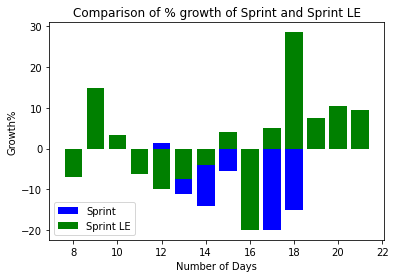

In [38]:
# Creating a stacked bar plot to highlight the % growth/decline of Sprint and Sprint LE

plt.bar(growth_comp.index,growth_comp["% growth/decline in sales of sprint"],label='Sprint',color='blue')
plt.bar(growth_comp.index,growth_comp["% growth/decline in sales of sprint LE"],label='Sprint LE',color='green')
plt.xlabel('Number of Days')
plt.ylabel('Growth%')
plt.legend()
plt.title('Comparison of % growth of Sprint and Sprint LE')
plt.rcParams['figure.figsize']=[10,10]
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

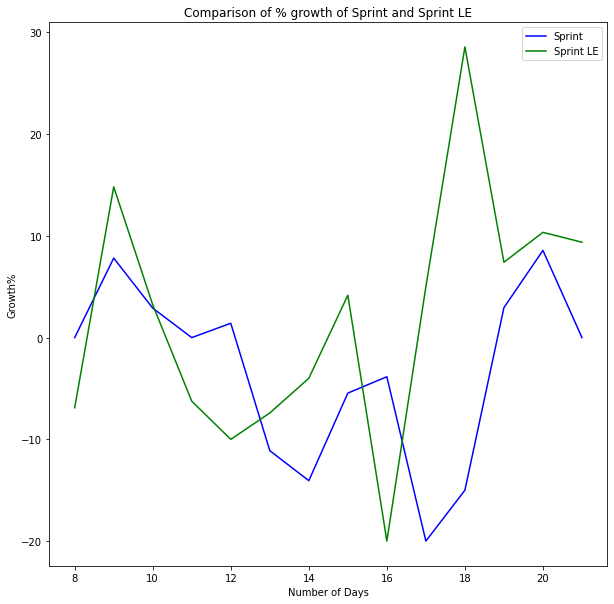

In [39]:
# Creating a line plot 

plt.plot(growth_comp.index,growth_comp["% growth/decline in sales of sprint"],label='Sprint',color='blue')
plt.plot(growth_comp.index,growth_comp["% growth/decline in sales of sprint LE"],label='Sprint LE',color='green')
plt.xlabel('Number of Days')
plt.ylabel('Growth%')
plt.legend()
plt.title('Comparison of % growth of Sprint and Sprint LE')
plt.rcParams['figure.figsize']=[10,10]
plt.show

# Milestone 2 - Email analysis

In [40]:
emails

,email_id,customer_id,opened,clicked,bounced,sent_date,opened_date,clicked_date,email_subject_id
0,1,18,f,f,f,2011-01-03 15:00:00,NaN,NaN,6
1,2,30,f,f,f,2011-01-03 15:00:00,NaN,NaN,6
2,3,41,t,f,f,2011-01-03 15:00:00,04-01-2011 10:41,NaN,6
3,4,52,f,f,f,2011-01-03 15:00:00,NaN,NaN,6
4,5,59,f,f,f,2011-01-03 15:00:00,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...
418153,418154,49996,f,f,f,2019-01-07 15:00:00,NaN,NaN,3
418154,418155,49997,t,f,f,2019-01-07 15:00:00,08-01-2019 17:30,NaN,3
418155,418156,49998,f,f,f,2019-01-07 15:00:00,NaN,NaN,3
418156,418157,49999,t,f,f,2019-01-07 15:00:00,08-01-2019 13:11,NaN,3


In [41]:
email_subject

,email_subject_id,email_subject
0,1,25% off all EVs. It's a Christmas Time
1,2,A Brand New Scooter...and Car
2,3,"A New Year, And Some New EVs"
3,4,An Electric Car for a New Age
4,5,"Green Cars , Green Friday Offer"
5,6,Introducing A Limited Edition
6,7,Sprint Up your Ride
7,8,Save the Planet with some Holiday Savings
8,9,Take out your Electric Scooter for Holiday
9,10,The 2013 FioNex Scooter is Here


In [42]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418158 entries, 0 to 418157
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   email_id          418158 non-null  int64 
 1   customer_id       418158 non-null  int64 
 2   opened            418158 non-null  object
 3   clicked           418158 non-null  object
 4   bounced           418158 non-null  object
 5   sent_date         418158 non-null  object
 6   opened_date       83579 non-null   object
 7   clicked_date      10064 non-null   object
 8   email_subject_id  418158 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 28.7+ MB


In [43]:
# Converting the 'sent_date' to datetime, and then using dt.date to convert into only date (object)

emails["sent_date"]=pd.to_datetime(emails["sent_date"]).dt.date

In [44]:
# Sorting email according to sent date

emails.sort_values("sent_date", inplace=True)

In [45]:
emails

,email_id,customer_id,opened,clicked,bounced,sent_date,opened_date,clicked_date,email_subject_id
0,1,18,f,f,f,2011-01-03,NaN,NaN,6
2805,2806,33757,f,f,f,2011-01-03,NaN,NaN,6
2806,2807,33768,f,f,f,2011-01-03,NaN,NaN,6
2807,2808,33778,f,f,f,2011-01-03,NaN,NaN,6
2808,2809,33817,f,f,f,2011-01-03,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...
386535,386536,16691,f,f,f,2019-01-07,NaN,NaN,3
386536,386537,16692,f,f,f,2019-01-07,NaN,NaN,3
386537,386538,16693,f,f,f,2019-01-07,NaN,NaN,3
386528,386529,16684,f,f,f,2019-01-07,NaN,NaN,3


In [46]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418158 entries, 0 to 418157
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   email_id          418158 non-null  int64 
 1   customer_id       418158 non-null  int64 
 2   opened            418158 non-null  object
 3   clicked           418158 non-null  object
 4   bounced           418158 non-null  object
 5   sent_date         418158 non-null  object
 6   opened_date       83579 non-null   object
 7   clicked_date      10064 non-null   object
 8   email_subject_id  418158 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 31.9+ MB


In [47]:
# Converting the 'sent_date' to datetime object for future use and calculations

emails["sent_date"]=pd.to_datetime(emails["sent_date"])

In [48]:
# Email data specifically for 'sprint' scooters

emails_sprint=emails[emails["email_subject_id"]==7]

In [49]:
emails_sprint

,email_id,customer_id,opened,clicked,bounced,sent_date,opened_date,clicked_date,email_subject_id
198116,198117,33216,f,f,f,2016-09-21,NaN,NaN,7
198114,198115,33213,f,f,f,2016-09-21,NaN,NaN,7
198113,198114,33212,t,f,f,2016-09-21,22-09-2016 10:44,NaN,7
198115,198116,33214,f,f,f,2016-09-21,NaN,NaN,7
198096,198097,33192,f,f,f,2016-09-21,NaN,NaN,7
...,...,...,...,...,...,...,...,...,...
186423,186424,16641,f,f,f,2016-09-21,NaN,NaN,7
186424,186425,16643,t,f,f,2016-09-21,22-09-2016 12:15,NaN,7
186425,186426,16644,f,f,f,2016-09-21,NaN,NaN,7
186426,186427,16646,t,f,f,2016-09-21,22-09-2016 08:25,NaN,7


In [50]:
# The sprint model started on 10-10-2016, the campaign started 2 months back

emails_sprint.sort_values("sent_date", inplace=True)

In [51]:
emails_sprint

,email_id,customer_id,opened,clicked,bounced,sent_date,opened_date,clicked_date,email_subject_id
198116,198117,33216,f,f,f,2016-09-21,NaN,NaN,7
174750,174751,21,f,f,f,2016-09-21,NaN,NaN,7
174736,174737,2,f,f,f,2016-09-21,NaN,NaN,7
174737,174738,5,t,f,f,2016-09-21,22-09-2016 10:12,NaN,7
174738,174739,6,f,f,f,2016-09-21,NaN,NaN,7
...,...,...,...,...,...,...,...,...,...
209791,209792,49982,f,f,f,2016-09-21,NaN,NaN,7
209790,209791,49981,f,f,f,2016-09-21,NaN,NaN,7
209772,209773,49951,f,f,f,2016-09-21,NaN,NaN,7
209795,209796,49990,f,f,f,2016-09-21,NaN,NaN,7


In [52]:
# All the emails regarding the promotion of 'sprint' scooter was sent to the 35067 customers on 21-09-2016

emails_sprint["sent_date"].value_counts()

2016-09-21    35067
Name: sent_date, dtype: int64

In [53]:
# Separating the main dataframe "emails" using the date range of 2 months marketing campaign

# Since production started on 10-10-2016, I backtraced the 2 months duration i.e. 60 days, which comes to 10-8-2016

emails_sprint_date=emails.loc[(emails["sent_date"]>'2016-08-10') & (emails["sent_date"]<'2016-10-10')]

In [54]:
emails_sprint_date

,email_id,customer_id,opened,clicked,bounced,sent_date,opened_date,clicked_date,email_subject_id
198116,198117,33216,f,f,f,2016-09-21,NaN,NaN,7
198114,198115,33213,f,f,f,2016-09-21,NaN,NaN,7
198113,198114,33212,t,f,f,2016-09-21,22-09-2016 10:44,NaN,7
198115,198116,33214,f,f,f,2016-09-21,NaN,NaN,7
198096,198097,33192,f,f,f,2016-09-21,NaN,NaN,7
...,...,...,...,...,...,...,...,...,...
186423,186424,16641,f,f,f,2016-09-21,NaN,NaN,7
186424,186425,16643,t,f,f,2016-09-21,22-09-2016 12:15,NaN,7
186425,186426,16644,f,f,f,2016-09-21,NaN,NaN,7
186426,186427,16646,t,f,f,2016-09-21,22-09-2016 08:25,NaN,7


In [55]:
# Counting the f & t of bounced emails

emails_sprint["bounced"].value_counts()

f    34942
t      125
Name: bounced, dtype: int64

In [56]:
# Counting the f & t of clicked emails

emails_sprint["clicked"].value_counts()

f    34219
t      848
Name: clicked, dtype: int64

In [57]:
# Counting the f & t of opened emails

emails_sprint["opened"].value_counts()

f    28072
t     6995
Name: opened, dtype: int64

In [58]:
# click_rate = emails clicked (t)/net emails        net emails = total emails - emails bounced

click_rate=848/(35067-125)

print(click_rate*100)

2.426878827771736


In [59]:
# email_opening_rate = emails opened(t)/net emails   net emails = total emails - emails bounced

email_opening_rate=6995/(35067-125)

print(email_opening_rate*100)

20.018888443706714


In [60]:
# Creating comparison_table by first creating a list of lists, and then converting into dataframe and assigning column and index names

data = [[click_rate*100,8], [email_opening_rate*100,18]]

comparison_table=pd.DataFrame(data, columns=["Calculated","Industry Standard"], index=["Click Rate","E-mail Opening Rate"])

# D3: Comparison of calculated and industry benchmarks

In [61]:
comparison_table

,Calculated,Industry Standard
Click Rate,2.426879,8
E-mail Opening Rate,20.018888,18


In [62]:
# Created a small if-else loop; 

if(click_rate*100)>18 and (email_opening_rate*100)>8:
    print("Campaign is a success")
else:
    print("Campaign is a failure")

Campaign is a failure
